## Comision case

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
formatter = ticker.FuncFormatter(lambda x, _: f'S/.{x/1e6:,.0f}M')

In [2]:
sales_df = pd.read_csv('sales.csv')
sales_df.head()

,n,target,sale
0,1,75000,66422.10
1,2,200000,192957.72
2,3,75000,79501.22
3,4,400000,388659.33
4,5,100000,98313.56


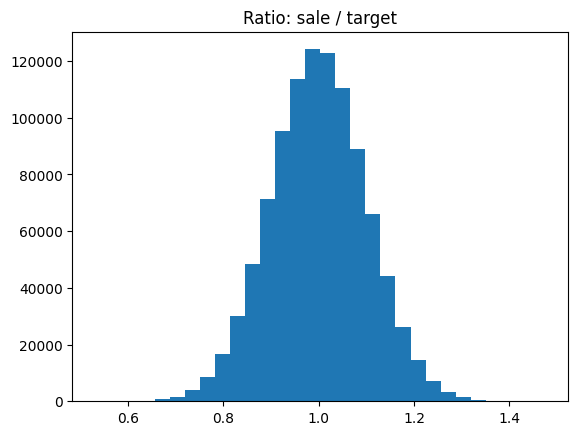

In [3]:
sales_ratio = sales_df['sale'] / sales_df['target']
plt.hist(sales_ratio, bins=30)
plt.title("Ratio: sale / target")
plt.show()

In [4]:
sales_df.describe()

,n,target,sale
count,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,170032.850000,170048.963271
std,288675.278932,117164.264596,118956.834350
min,1.000000,75000.000000,39843.860000
25%,250000.750000,100000.000000,89254.310000
50%,500000.500000,100000.000000,106767.995000
75%,750000.250000,200000.000000,213446.745000
max,1000000.000000,500000.000000,738068.470000


In [5]:
target_df = sales_df['target'].value_counts(normalize=True).reset_index()
target_df['proportion'] = target_df['proportion'].round(2)
target_df.sort_values('target')

,target,proportion
2,75000,0.20
0,100000,0.40
1,200000,0.20
3,300000,0.10
4,400000,0.05
5,500000,0.05


---

### Simulación

In [6]:
def generate_sale_ratios(q):
    return np.random.normal(sales_ratio.mean(), sales_ratio.std(), q)

def generate_targets(q):
    bases = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
    probability = [.2, .4, .2, .1, .05, .05]
    return np.random.choice(bases, q, p=probability)

def generate_simulation(q):
    simul_df = pd.DataFrame(index=range(q), data={
        'sale_ratio': generate_sale_ratios(q),
        'target': generate_targets(q)
    })
    simul_df['sale'] = simul_df['sale_ratio'] * simul_df['target']
    return simul_df

In [7]:
test_df = generate_simulation(10)
test_df

,sale_ratio,target,sale
0,1.168174,75000,87613.065011
1,1.028345,300000,308503.600706
2,1.130196,300000,339058.702493
3,1.034678,100000,103467.789691
4,0.906540,200000,181308.091700
5,1.054805,100000,105480.491354
6,1.051421,200000,210284.287971
7,0.883022,100000,88302.214001
8,0.978437,200000,195687.330346
9,1.075006,200000,215001.137628


In [8]:
def comision_rate(sale_ratio):
    if sale_ratio <= 0.85:
        return 0.2
    elif sale_ratio <= 0.99:
        return 0.3
    else:
        return 0.4

def generate_comision(df):
    df['comision_rate'] = df['sale_ratio'].apply(comision_rate)
    df['comision'] = df['comision_rate'] * df['sale']
    return df

In [9]:
generate_comision(test_df)

,sale_ratio,target,sale,comision_rate,comision
0,1.168174,75000,87613.065011,0.4,35045.226005
1,1.028345,300000,308503.600706,0.4,123401.440282
2,1.130196,300000,339058.702493,0.4,135623.480997
3,1.034678,100000,103467.789691,0.4,41387.115877
4,0.906540,200000,181308.091700,0.3,54392.427510
5,1.054805,100000,105480.491354,0.4,42192.196542
6,1.051421,200000,210284.287971,0.4,84113.715188
7,0.883022,100000,88302.214001,0.3,26490.664200
8,0.978437,200000,195687.330346,0.3,58706.199104
9,1.075006,200000,215001.137628,0.4,86000.455051


---

In [10]:
num_simulaciones = 2000
num_sales = 500
data = []

for _ in range(num_simulaciones):
    simul_df = generate_simulation(num_sales)
    simul_df = generate_comision(simul_df)
    data.append((
        simul_df['target'].sum().round(0),
        simul_df['sale'].sum().round(2),
        simul_df['comision'].sum().round(2)
    ))

result_df = pd.DataFrame.from_records(data, columns=['target', 'sale', 'comision'])
result_df

,target,sale,comision
0,83625000,83661462.51,29417487.55
1,83875000,83665080.94,29465497.75
2,78700000,78486796.64,27447627.93
3,86250000,86707231.56,30797598.33
4,84725000,85058872.73,30181343.82
...,...,...,...
1995,84300000,83708023.39,29313210.35
1996,87825000,87391155.03,30778982.70
1997,90825000,91683550.49,32987307.35
1998,83050000,83212150.61,29461313.00


In [11]:
result_df.describe().style.format('{:.2f}')

,target,sale,comision
count,2000.00,2000.00,2000.00
mean,85094687.50,85116113.31,30017490.13
std,2697545.03,2764108.65,1061353.78
min,75000000.00,74226737.44,25688194.59
25%,83368750.00,83324971.93,29314412.17
50%,85075000.00,85075839.23,30017670.74
75%,86800000.00,86923146.82,30721176.45
max,93875000.00,94189236.20,33580309.01


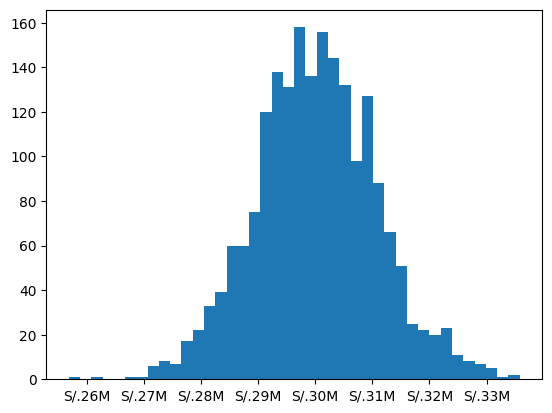

In [12]:
plt.gca().xaxis.set_major_formatter(formatter)
plt.hist(result_df['comision'], bins=40)
plt.show()